#Question and Answer Text Analysis

## Load Libraries

In [1]:
#run both R and python 
%load_ext rpy2.ipython

In [2]:
#mount google drive to load pre installs and zipped libraries
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
#extract library zip file "cv.library.tar.gz" from location - https://drive.google.com/drive/folders/1z3tM37Cf7zr3hXF5EtPMRnMwdoEb6arm
#make sure the folder is added to your personal google drive
%cp drive/MyDrive/R_libraries/cv.library.tar.gz .

In [4]:
!du -sh cv.library.tar.gz

241M	cv.library.tar.gz


In [5]:
#copy library to current colab directory
!tar xf cv.library.tar.gz

tar: Removing leading `/' from member names


In [6]:
%ls usr/local/lib/R/site-library/

BH/            htmlwidgets/  mgsub/         proxy/       syuzhet/
caret/         hunspell/     ModelMetrics/  qdapRegex/   textclean/
crosstalk/     ipred/        NLP/           Rcpp/        textshape/
dtt/           IRdisplay/    numDeriv/      recipes/     tibble/
e1071/         IRkernel/     pacman/        repr/        tidytext/
english/       iterators/    parallelly/    reshape2/    tidyverse/
foreach/       janeaustenr/  pbdZMQ/        rpart/       timeDate/
future/        later/        plotly/        rpart.plot/  tm/
future.apply/  lava/         plyr/          sentimentr/  tokenizers/
ggplot2/       lazyeval/     pROC/          slam/        tree/
globals/       lexicon/      prodlim/       SnowballC/   wordcloud/
gower/         listenv/      progressr/     SQUAREM/     zoo/
hardhat/       lubridate/    promises/      stringdist/


In [7]:
%%R
.libPaths('usr/local/lib/R/site-library/')
.libPaths()

[1] "/content/usr/local/lib/R/site-library"
[2] "/usr/local/lib/R/site-library"        
[3] "/usr/lib/R/site-library"              
[4] "/usr/lib/R/library"                   


In [8]:
#install python libraries
from IPython.display import display, HTML

In [9]:
#load R libraries
#use %%R for every cell that runs R code
%%R
library(tidyverse)
library(dplyr)
library(plotly)
library(lubridate)
library(ggplot2)
library(readr)
#text similarity, sentiment analysis libraries
library(tidytext)
library(stringdist)
library(tm)
library(wordcloud)
library(reshape2)
pacman::p_load_current_gh("trinker/lexicon", "trinker/sentimentr")
#decision tree
library(rpart)
library(rpart.plot)
library(caret)
library(pROC)
library(tree)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

R[write to console]: 
Attaching package: ‘plotly’


R[write to console]: The following object is masked from ‘package:ggplot2’:

    last_plot


R[write to console]: The following object is masked from ‘package:stats’:

    filter


R[write to console]: The following object is masked from ‘package:graphics’:

    layout


R[write to console]: 
Attaching package: ‘lubridate’


R[write to console]: The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


R[write to console]: 
Attaching package: ‘stringdist’


R[

In [10]:
#install necessary python libraries
! pip install -U textblob
! pip install wordcloud
! pip install gensim==3.8.3
! pip install pattern
! pip install spacy==2.2.4
! pip install pyLDAvis
! python -m spacy download en

import numpy as np
import pandas as pd
from pprint import pprint
import requests
from io import BytesIO
from PIL import Image
from textblob import TextBlob
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

#import nltk and spacy
import nltk; 
nltk.download('stopwords')
from nltk.corpus import stopwords

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import TfidfModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

     |████████████████████████████████| 636 kB 15.4 MB/s 
  Attempting uninstall: textblob
    Found existing installation: textblob 0.15.3
    Uninstalling textblob-0.15.3:
      Successfully uninstalled textblob-0.15.3
     |████████████████████████████████| 24.2 MB 1.4 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
     |████████████████████████████████| 22.2 MB 1.5 MB/s 
     |████████████████████████████████| 87 kB 6.3 MB/s 
     |████████████████████████████████| 81 kB 9.9 MB/s 
     |████████████████████████████████| 5.6 MB 33.8 MB/s 
     |████████████████████████████████| 5.6 MB 42.9 MB/s 
     |████████████████████████████████| 419 kB 64.2 MB/s 
     |████████████████████████████████| 104 kB 64.9 MB/s 
     |████████████████████████████████| 3.6 MB 28.3 MB/s 
  Created wheel for pattern: filename=Pattern-3.6-py3-none-any.whl size=22332721 sha256=e15b4ca4e3272d6633f06

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


## Load data

In [11]:
%%R
#load questions and answers data
questions_url <- 'https://media.githubusercontent.com/media/nthammadi-uncc/CareerVillage/main/data/clean/questions.csv'
answers_url <- 'https://media.githubusercontent.com/media/nthammadi-uncc/CareerVillage/main/data/clean/answers.csv'
questions_df <- read.csv(questions_url)
answers_df <- read.csv(answers_url)
print(dim(questions_df))
print(dim(answers_df))

[1] 23931    21
[1] 51123    18


In [12]:
%%R
str(questions_df)
str(answers_df)

'data.frame':	23931 obs. of  21 variables:
 $ X                           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ questions_id                : chr  "332a511f1569444485cf7a7a556a5e54" "eb80205482e4424cad8f16bc25aa2d9c" "4ec31632938a40b98909416bdd0decff" "2f6a9a99d9b24e5baa50d40d0ba50a75" ...
 $ questions_author_id         : chr  "8f6f374ffd834d258ab69d376dd998f5" "acccbda28edd4362ab03fb8b6fd2d67b" "f2c179a563024ccc927399ce529094b5" "2c30ffba444e40eabb4583b55233a5a4" ...
 $ questions_date_added        : chr  "2016-04-26 11:14:26 UTC+0000" "2016-05-20 16:48:25 UTC+0000" "2017-02-08 19:13:38 UTC+0000" "2017-09-01 14:05:32 UTC+0000" ...
 $ questions_title             : chr  "Teacher   career   question" "I want to become an army officer. What can I do to become an army officer?" "Will going abroad for your first job increase your chances for jobs back home?" "To become a specialist in business  management, will I have to network myself?" ...
 $ questions_body              : chr  "What  is  a  m

## Text Similarity Analysis

### Text Similarity measures of questions with tags

In [13]:
%%R
#create similarity index columns and initialize to NA
questions_df['question_tag_sim_index'] <- NA


In [14]:
%%R
# check similarities between tags and question title, body
for (i in 1:nrow(questions_df)) {
    #get the tags cell value
    tags <- c(questions_df[i,8]) #8th column is all_tags
    ques_title <- c(questions_df[i,5]) #5th column is question title
    ques_body <- c(questions_df[i,6]) #6th column is question body
    #get similarity indexes using Jaccard distance method
    question_title_tag_sim_index <- stringdist(tags,ques_title, method="jaccard") 
    question_body_tag_sim_index<- stringdist(tags,ques_body, method="jaccard") 
    questions_df[i,22] <- (question_title_tag_sim_index+question_body_tag_sim_index)/2  #22nd column is question_tag_sim_index; take the average of both similarity
}


In [15]:
%%R
summary(questions_df)

       X         questions_id       questions_author_id questions_date_added
 Min.   :    1   Length:23931       Length:23931        Length:23931        
 1st Qu.: 5984   Class :character   Class :character    Class :character    
 Median :11966   Mode  :character   Mode  :character    Mode  :character    
 Mean   :11966                                                              
 3rd Qu.:17948                                                              
 Max.   :23931                                                              
 questions_title    questions_body     question_score    all_tags        
 Length:23931       Length:23931       Min.   :  0.0   Length:23931      
 Class :character   Class :character   1st Qu.:  1.0   Class :character  
 Mode  :character   Mode  :character   Median :  2.0   Mode  :character  
                                       Mean   :  2.9                     
                                       3rd Qu.:  3.0                     
                 

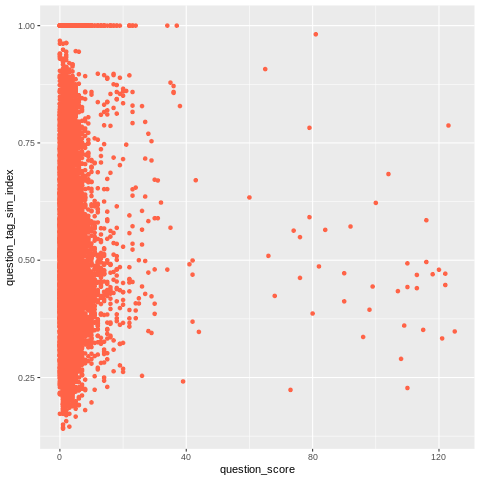

In [16]:
%%R
# scatter plot of question score with question_tag similarity index
ggplot(questions_df, aes(x=question_score, y=question_tag_sim_index)) + geom_point(color="tomato")

### Text Similarity measures of answers with tags

In [17]:
%%R
#create similarity index columns and initialize to NA
answers_df['answer_tag_sim_index'] <- NA


In [18]:
%%R
# check similarities between tags and answers
for (i in 1:nrow(answers_df)) {
    #get the tags cell value
    tags <- c(answers_df[i,17]) #17th column is all_tags
    answer_body <- c(answers_df[i,6]) #6th column is answer
    #get similarity indexes using Jaccard distance method
    answers_df[i,19] <- stringdist(tags,answer_body, method="jaccard") #19th column is answer_tag_sim_index; 
}


In [19]:
%%R
summary(answers_df)

       X          answers_id        answers_author_id  answers_question_id
 Min.   :    1   Length:51123       Length:51123       Length:51123       
 1st Qu.:12782   Class :character   Class :character   Class :character   
 Median :25562   Mode  :character   Mode  :character   Mode  :character   
 Mean   :25562                                                            
 3rd Qu.:38342                                                            
 Max.   :51123                                                            
 answers_date_added answers_body        answer_score     total_comments  
 Length:51123       Length:51123       Min.   : 0.0000   Min.   : 0.000  
 Class :character   Class :character   1st Qu.: 0.0000   1st Qu.: 0.000  
 Mode  :character   Mode  :character   Median : 0.0000   Median : 0.000  
                                       Mean   : 0.4154   Mean   : 0.246  
                                       3rd Qu.: 1.0000   3rd Qu.: 0.000  
                               

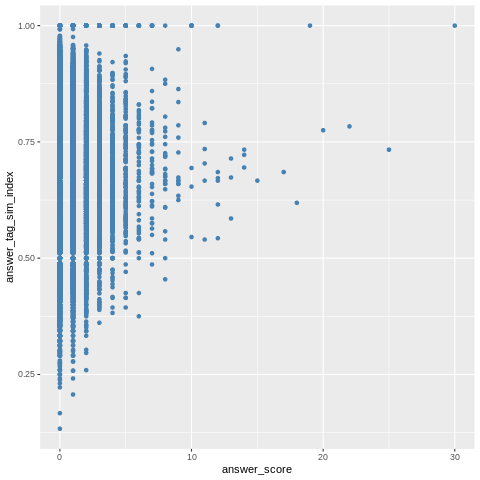

In [20]:
%%R
# scatter plot of answer score with answer_tag similarity index
ggplot(answers_df, aes(x=answer_score, y=answer_tag_sim_index)) + geom_point(color="steelblue")

## Sentiment Analysis

### Sentiment Analysis of questions

In [21]:
%%R 
##combine question text and body into one column
questions_df$questions_title_body <- paste(questions_df$questions_title,questions_df$questions_body)

In [22]:
%%R
#get the corpus of text
question_corpus <- iconv(questions_df$questions_title_body)
question_corpus <- Corpus(VectorSource(question_corpus))
inspect(question_corpus[1:5])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] Teacher   career   question What  is  a  maths  teacher?   what  is  a  maths  teacher  useful? #college #professor #lecture                                                                                                                                                                                                                                                                                                                                                                                                                                                   
[2] I want to become an army officer. What can I do to become an army officer? I am Priyanka from Bangalore . Now am in 10th std . When I go to college I should not get confused on what I want to take to become army officer. So I am asking this question  #military #army                                                                  

In [23]:
%%R
#clean the text
#change case to lower
question_corpus <- tm_map(question_corpus, tolower)
#remove punctuations
question_corpus <- tm_map(question_corpus, removePunctuation)
#remove numbers
question_corpus <- tm_map(question_corpus, removeNumbers)
#remove stopwords
question_clean_corpus <- tm_map(question_corpus, removeWords, stopwords('english'))
#remove any urls
removeURL <- function(x) gsub('http[[:alnum:]]*', '', x)
question_clean_corpus <- tm_map(question_clean_corpus, content_transformer(removeURL))
#text remove white spaces
question_clean_corpus <- tm_map(question_clean_corpus, stripWhitespace)
#remove additional stop words
question_clean_corpus <- tm_map(question_clean_corpus, removeWords, c('can','cant','get','ive','will','one','also'))
#replace some words
question_clean_corpus <- tm_map(question_clean_corpus, gsub,
                   pattern = 'jobs',
                   replacement = 'job')
inspect(question_clean_corpus[1:5])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] teacher career question maths teacher maths teacher useful college professor lecture                                                                                                                                                                                                                                                                                                       
[2]  want become army officer  become army officer priyanka bangalore now th std go college  confused want take become army officer asking question military army                                                                                                                                                                                                                              
[3]  going abroad first job increase chances job back home im planning going abroad first job  teaching job dont serious career idea

In [24]:
%%R
#convert corpus into dataframe
question_clean_corpus_df<-data.frame(text= get("content", question_clean_corpus))
print(dim(question_clean_corpus_df))

[1] 23931     1


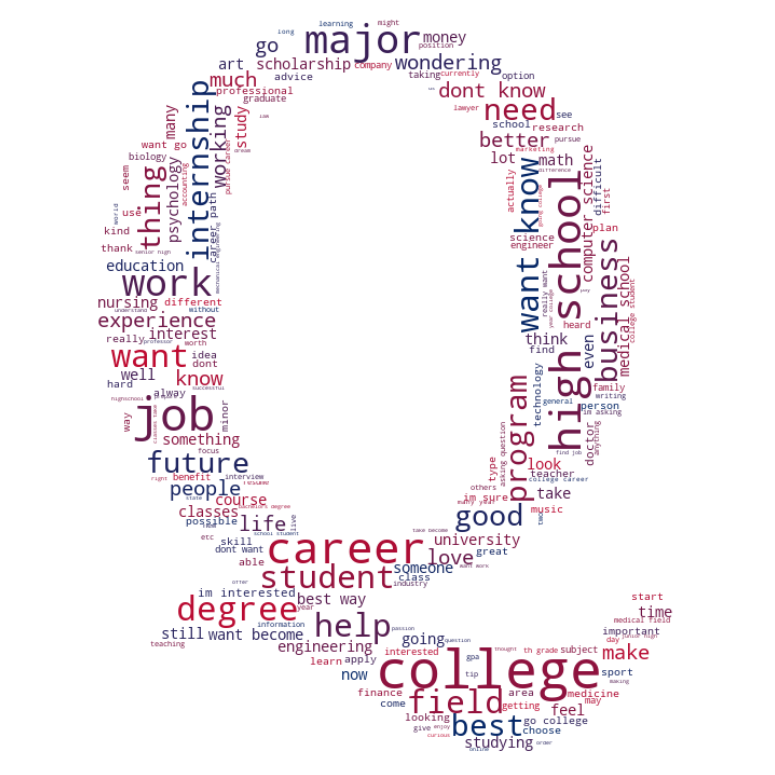

In [25]:
#convert R data frame to python dataframe
%R -o question_clean_corpus_df
#plot word cloud
all_words=' '.join([twts for twts in question_clean_corpus_df['text']])
response = requests.get("https://raw.githubusercontent.com/nthammadi-uncc/CareerVillage/main/images/Q_mask_wordcloud.jpeg")
mask = np.array(Image.open(BytesIO(response.content)))
colors = ["#BF0A30", "#002868"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)
word_cloud=WordCloud(width = 3000, height = 2000,random_state=1, max_font_size=119, background_color='white',mask=mask,colormap=cmap,max_words=200).generate(all_words)
plt.figure(figsize=(10,10), dpi=100)
plt.axis("off")
plt.imshow(word_cloud,interpolation='bilinear') 
plt.show()

In [26]:
%%R
#tokenize corpus
question_clean_corpus_df <- question_clean_corpus_df %>% unnest_tokens(word, text)
head(question_clean_corpus_df)

      word
1  teacher
2   career
3 question
4    maths
5  teacher
6    maths


Joining, by = "word"


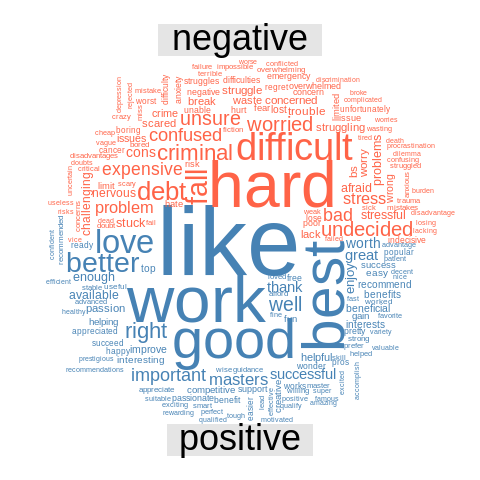

In [27]:
%%R
#plot a word cloud of sentiment
wordcloud_sentiment <- question_clean_corpus_df %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  acast(word ~ sentiment, value.var = "n", fill = 0) %>%
  comparison.cloud(colors = c("tomato", "steelblue"), scale=c(8,.5),
                   max.words = 200)


In [28]:
%%R 
#get question id and score and merge with corpus
question_details_df <- select(questions_df, c(questions_id, question_score))
question_details_df$question_corpus <- NA
question_details_df$question_corpus<- question_clean_corpus$content
print(dim(question_details_df))

[1] 23931     3


In [29]:
%%R
str(question_details_df)

'data.frame':	23931 obs. of  3 variables:
 $ questions_id   : chr  "332a511f1569444485cf7a7a556a5e54" "eb80205482e4424cad8f16bc25aa2d9c" "4ec31632938a40b98909416bdd0decff" "2f6a9a99d9b24e5baa50d40d0ba50a75" ...
 $ question_score : num  1 5 2 2 2 1 2 1 3 1 ...
 $ question_corpus: chr  "teacher career question maths teacher maths teacher useful college professor lecture" " want become army officer  become army officer priyanka bangalore now th std go college  confused want take bec"| __truncated__ " going abroad first job increase chances job back home im planning going abroad first job  teaching job dont se"| __truncated__ " become specialist business management  network hear business management hard way  job youre known right areas "| __truncated__ ...


In [30]:
%%R
# add sentiment score to question text
question_details_df$sentiment_score <- sentiment(question_details_df$question_corpus)$sentiment 
question_details_df <- question_details_df %>% 
      mutate(sentiment_category = case_when(
      sentiment_score < 0 ~ 'Negative',
      sentiment_score == 0 ~ 'Neutral',
      sentiment_score > 0 ~ 'Positive'
      ) %>%
      factor(levels = c('Negative', 'Neutral', 'Positive'))
      )
str(question_details_df)

'data.frame':	23931 obs. of  5 variables:
 $ questions_id      : chr  "332a511f1569444485cf7a7a556a5e54" "eb80205482e4424cad8f16bc25aa2d9c" "4ec31632938a40b98909416bdd0decff" "2f6a9a99d9b24e5baa50d40d0ba50a75" ...
 $ question_score    : num  1 5 2 2 2 1 2 1 3 1 ...
 $ question_corpus   : chr  "teacher career question maths teacher maths teacher useful college professor lecture" " want become army officer  become army officer priyanka bangalore now th std go college  confused want take bec"| __truncated__ " going abroad first job increase chances job back home im planning going abroad first job  teaching job dont se"| __truncated__ " become specialist business management  network hear business management hard way  job youre known right areas "| __truncated__ ...
 $ sentiment_score   : num  0.4975 -0.1021 0.1707 0.3274 0.0853 ...
 $ sentiment_category: Factor w/ 3 levels "Negative","Neutral",..: 3 1 3 3 3 2 3 3 3 3 ...


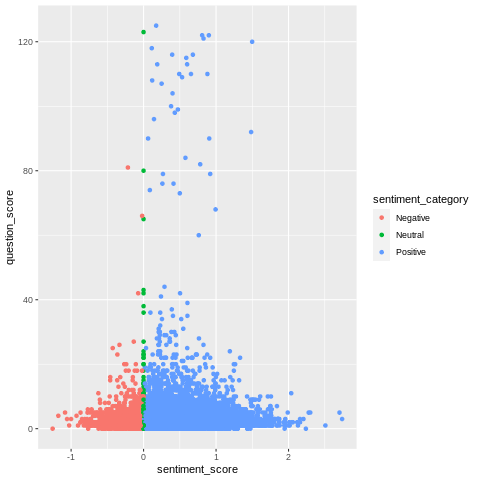

In [31]:
%%R
# scatter plot of sentiment score and question score
ggplot(question_details_df, aes(x=sentiment_score, y=question_score)) + geom_point(aes(color=sentiment_category))

### Sentiment Analysis of answers

In [32]:
%%R
#get the corpus of text
answer_corpus <- iconv(answers_df$answers_body)
answer_corpus <- Corpus(VectorSource(answer_corpus))
inspect(answer_corpus[1:5])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] <p>Hi!</p>\n<p>You are asking a very interesting question.  I am giving you two sites that will give you some of an explanation that may answer your question.</p>\n<p>http://mathforum.org/dr.math/faq/faq.why.math.html</p>\n<p>http://www.mathworksheetscenter.com/mathtips/mathissoimportant.html</p>\n<p>Let me know if this helps</p>                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [33]:
%%R
#clean the text
#change case to lower
answer_corpus <- tm_map(answer_corpus, tolower)
#remove HTML p tags
removePStart <- function(x) gsub('<p>',' ',x)
removePEnd <- function(x) gsub('</p>','',x)
answer_corpus <- tm_map(answer_corpus, content_transformer(removePStart)) 
answer_corpus <- tm_map(answer_corpus, content_transformer(removePEnd)) 
#remove punctuations
answer_corpus <- tm_map(answer_corpus, removePunctuation)
#remove numbers
answer_corpus <- tm_map(answer_corpus, removeNumbers)
#remove stopwords
answer_clean_corpus <- tm_map(answer_corpus, removeWords, stopwords('english'))
#remove any urls
removeURL <- function(x) gsub('http[[:alnum:]]*', '', x)
answer_clean_corpus <- tm_map(answer_clean_corpus, content_transformer(removeURL))
#text remove white spaces
answer_clean_corpus <- tm_map(answer_clean_corpus, stripWhitespace)
#remove additional stop words
answer_clean_corpus <- tm_map(answer_clean_corpus, removeWords, c('hi','can','cant','get','ive','will','one','also','br','etc'))
#replace some words
#cleanset <- tm_map(cleanset, gsub,
#                   pattern = 'jobs',
#                   replacement = 'job')
inspect(answer_clean_corpus[1:5])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1]   asking interesting question giving two sites  give explanation may answer question let know helps                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [34]:
%%R
#convert corpus into dataframe
answer_clean_corpus_df<-data.frame(text= get("content", answer_clean_corpus))
print(dim(answer_clean_corpus_df))

[1] 51123     1


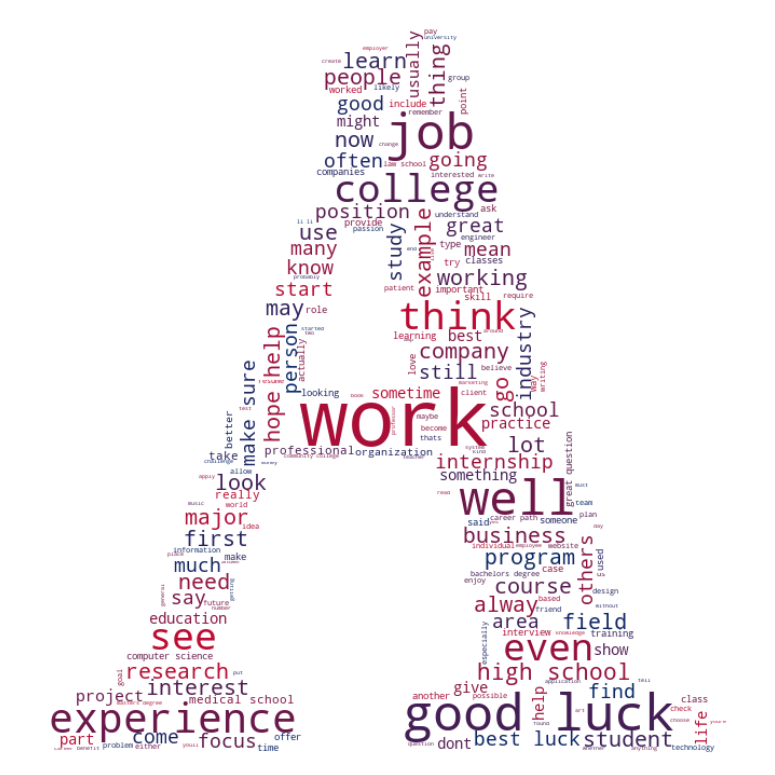

In [35]:
#convert R data frame to python dataframe
%R -o answer_clean_corpus_df
#plot word cloud
all_words=' '.join([twts for twts in answer_clean_corpus_df['text']])
response = requests.get("https://raw.githubusercontent.com/nthammadi-uncc/CareerVillage/main/images/A_mask_wordcloud.jpeg")
mask = np.array(Image.open(BytesIO(response.content)))
colors = ["#BF0A30", "#002868"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)
word_cloud=WordCloud(width = 3000, height = 2000,random_state=1, max_font_size=119, background_color='white',mask=mask,colormap=cmap,max_words=200).generate(all_words)
plt.figure(figsize=(10,10), dpi=100)
plt.axis("off")
plt.imshow(word_cloud,interpolation='bilinear') 
plt.show()

In [36]:
%%R
#tokenize corpus
answer_clean_corpus_df <- answer_clean_corpus_df %>% unnest_tokens(word, text)
head(answer_clean_corpus_df)

         word
1      asking
2 interesting
3    question
4      giving
5         two
6       sites


Joining, by = "word"


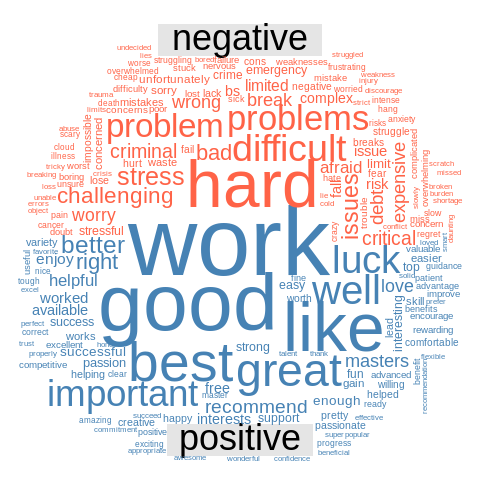

In [37]:
%%R
#plot a word cloud of sentiment
wordcloud_sentiment <- answer_clean_corpus_df %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  acast(word ~ sentiment, value.var = "n", fill = 0) %>%
  comparison.cloud(colors = c("tomato", "steelblue"), scale=c(8,.5),
                   max.words = 200)


In [38]:
%%R 
#get answer id and score and merge with corpus
answers_details_df <- select(answers_df, c(answers_id, answer_score))
answers_details_df$answer_corpus <- NA
answers_details_df$answer_corpus<- answer_clean_corpus$content
print(dim(answers_details_df))

[1] 51123     3


In [39]:
%%R
str(answers_details_df)

'data.frame':	51123 obs. of  3 variables:
 $ answers_id   : chr  "4e5f01128cae4f6d8fd697cec5dca60c" "ada720538c014e9b8a6dceed09385ee3" "eaa66ef919bc408ab5296237440e323f" "1a6b3749d391486c9e371fbd1e605014" ...
 $ answer_score : num  0 0 0 0 0 0 0 0 0 0 ...
 $ answer_corpus: chr  "  asking interesting question giving two sites  give explanation may answer question let know helps" "  joined army attended college received bachelors degree criminal justice commissioned officers enter military "| __truncated__ " dear priyanka greetings answered question eshwari days ago going reproduce answer bit modifications required b"| __truncated__ " work global company values highly international experience fact key experience look candidates therefore id sa"| __truncated__ ...


In [40]:
%%R
# add sentiment score to answer text
answers_details_df$sentiment_score <- sentiment(answers_details_df$answer_corpus)$sentiment 
answers_details_df <- answers_details_df %>% 
      mutate(sentiment_category = case_when(
      sentiment_score < 0 ~ 'Negative',
      sentiment_score == 0 ~ 'Neutral',
      sentiment_score > 0 ~ 'Positive'
      ) %>%
      factor(levels = c('Negative', 'Neutral', 'Positive'))
      )
str(answers_details_df)

'data.frame':	51123 obs. of  5 variables:
 $ answers_id        : chr  "4e5f01128cae4f6d8fd697cec5dca60c" "ada720538c014e9b8a6dceed09385ee3" "eaa66ef919bc408ab5296237440e323f" "1a6b3749d391486c9e371fbd1e605014" ...
 $ answer_score      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ answer_corpus     : chr  "  asking interesting question giving two sites  give explanation may answer question let know helps" "  joined army attended college received bachelors degree criminal justice commissioned officers enter military "| __truncated__ " dear priyanka greetings answered question eshwari days ago going reproduce answer bit modifications required b"| __truncated__ " work global company values highly international experience fact key experience look candidates therefore id sa"| __truncated__ ...
 $ sentiment_score   : num  0.481 1.249 1.285 0.534 1.226 ...
 $ sentiment_category: Factor w/ 3 levels "Negative","Neutral",..: 3 3 3 3 3 3 3 3 3 3 ...


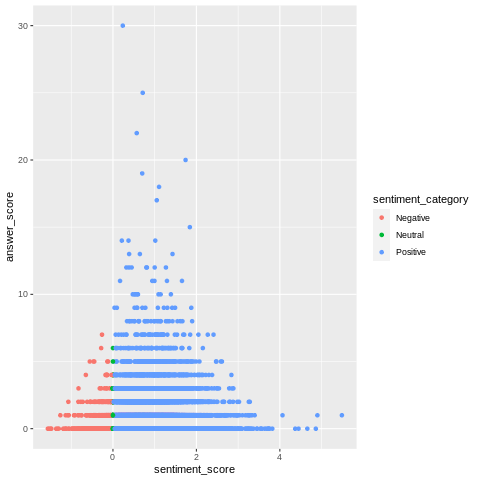

In [41]:
%%R
# scatter plot of sentiment score and answer score
ggplot(answers_details_df, aes(x=sentiment_score, y=answer_score)) + geom_point(aes(color=sentiment_category))

## Topic Modeling

In [42]:
#common functions for topic modeling

#function to convert sentence to words
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

#create list of stopwords
def define_stop_words(additional_word_list):
    stop_words = stopwords.words('english')
    stop_words=stop_words+additional_word_list
    return stop_words

#define functions for stop words, bigrams and lemmatization
def remove_stopwords(texts, stop_words):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    
#function to create bigrams
def make_bigrams(texts,bigram_threshold):
    bigram = gensim.models.Phrases(texts, min_count=5, threshold=bigram_threshold) # higher threshold fewer phrases
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return [bigram_mod[doc] for doc in texts]

#function to create bigrams and trigrams
def make_bigrams_trigrams(texts,bigram_threshold):
    bigram = gensim.models.Phrases(texts, min_count=5, threshold=bigram_threshold) # higher threshold fewer phrases
    trigram = gensim.models.Phrases(bigram[texts], threshold=bigram_threshold)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram_mod = gensim.models.phrases.Phraser(trigram)
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

#function to convert texts into lemmatized texts that take the context into account
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

#function to create LDA model
#input: 
#   text_list = list of sentences
#   add_stop_word_list = list of stopwords
#   num_topics = number of topics to train the model
#   bigram_threshold = higher the threshold value fewer the bigram phrases
#output:
#   lda_model: resultant LDA Model
#   corpus: Corpus of words
#   id2word: id to word vector
#   text_to_words: lemmatized text
def create_LDA_mod(text_list, add_stop_word_list, num_topics, bigram_threshold):
    #convert sentences to words
    text_to_words=list(sent_to_words(text_list))

    #define stopwords
    stop_words= define_stop_words(add_stop_word_list)
    
    #remove stopwords
    text_to_words = remove_stopwords(text_to_words, stop_words)
    
    #create bigrams and trigrams
    text_to_words = make_bigrams_trigrams(text_to_words,bigram_threshold)
    
    # Initialize spacy 'en' model, keeping only tagger component (for efficiency)
    # python3 -m spacy download en
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

    # Do lemmatization keeping only noun, adj, vb, adv
    text_to_words = lemmatization(text_to_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

    id2word = corpora.Dictionary(text_to_words)
    corpus = [id2word.doc2bow(text) for text in text_to_words]

    # implement TF-IDF to weight words
    tfidf = TfidfModel(corpus, id2word=id2word)

    #Filter low value words and also words missing in tfidf models.
    low_value = 0.005
    words =[]
    words_missing_in_tfidf = []
    for i in range(0, len(corpus)):
        bow = corpus[i]
        low_value_words = [] #reinitialize to be safe. You can skip this.
        tfidf_ids = [id for id, value in tfidf[bow]]
        bow_ids = [id for id, value in bow]
        low_value_words = [id for id, value in tfidf[bow] if value < low_value]
        words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

        new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]  

        #reassign        
        corpus[i] = new_bow
        
    # Build LDA model
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
    # Compute Perplexity
    print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=text_to_words, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print('\nCoherence Score: ', coherence_lda)
    
    return lda_model, corpus, id2word, text_to_words

def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

### Topic Modeling of Question topics

In [43]:
%%R
#convert corpus into dataframe
question_clean_corpus_df<-data.frame(text= get("content", question_clean_corpus))

In [44]:
%R -o question_clean_corpus_df
#define a list of additional stop words
add_stop_word_list=['want','know','become','go','be','get','make','s']
#create topic for questions text
question_lda, corpus, id2word, text_to_words=create_LDA_mod(question_clean_corpus_df['text'].values.tolist(),add_stop_word_list,15,90)


Perplexity:  -10.6343866511257

Coherence Score:  0.3750957593062255


In [45]:
# Print the Keyword in the 15 topics
pprint(question_lda.print_topics())

[(0,
  '0.134*"business" + 0.130*"start" + 0.112*"program" + 0.053*"management" + '
  '0.043*"finance" + 0.035*"summer" + 0.034*"subject" + 0.028*"accept" + '
  '0.027*"account" + 0.026*"accounting"'),
 (1,
  '0.500*"job" + 0.115*"well" + 0.057*"use" + 0.041*"long" + 0.028*"know" + '
  '0.028*"relate" + 0.027*"actually" + 0.026*"follow" + 0.026*"hire" + '
  '0.024*"salary"'),
 (2,
  '0.116*"go" + 0.079*"apply" + 0.069*"scholarship" + 0.040*"even" + '
  '0.038*"first" + 0.037*"see" + 0.033*"live" + 0.032*"idea" + 0.031*"come" + '
  '0.031*"difference"'),
 (3,
  '0.121*"thing" + 0.090*"may" + 0.084*"able" + 0.061*"important" + '
  '0.049*"order" + 0.047*"community" + 0.038*"resume" + 0.036*"answer" + '
  '0.033*"application" + 0.032*"position"'),
 (4,
  '0.296*"major" + 0.131*"science" + 0.117*"computer" + 0.042*"opportunity" + '
  '0.038*"offer" + 0.034*"specific" + 0.031*"minor" + 0.027*"chance" + '
  '0.025*"language" + 0.020*"collegemajor"'),
 (5,
  '0.088*"college" + 0.084*"school" 

In [46]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(question_lda, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.393044 -0.246954       1        1  29.450492
8      0.199139  0.409194       2        1  13.443527
11     0.018609  0.006500       3        1   6.502700
12     0.019093  0.007059       4        1   6.289817
2     -0.000458 -0.001455       5        1   6.044405
6      0.013071  0.003943       6        1   5.915549
4     -0.014431 -0.005977       7        1   5.189158
9     -0.028743 -0.010626       8        1   4.831331
0     -0.043805 -0.014987       9        1   4.511999
1     -0.059512 -0.018537      10        1   3.856631
13    -0.064641 -0.020025      11        1   3.803144
3     -0.081836 -0.023496      12        1   3.633541
7     -0.101691 -0.026685      13        1   2.786043
10    -0.117022 -0.028574      14        1   2.160013
14    -0.130818 -0.029380      15        1   1.581649, topic_info=                     Term          Freq         Total Category  logprob  \
28                    job   8492.000000   8492.000000  Default  30.0000   
0                  career  10849.000000  10849.000000  Default  29.0000   
69                  major   6757.000000   6757.000000  Default  28.0000   
10                   take   5841.000000   5841.000000  Default  27.0000   
7                 college  11389.000000  11389.000000  Default  26.0000   
...                   ...           ...           ...      ...      ...   
2691  physician_assistant      0.069303      1.103122  Topic15 -11.5180   
1266                score      0.069543      1.106988  Topic15 -11.5146   
867             therapist      0.069633      1.108622  Topic15 -11.5133   
871                  ever      0.070039      1.121692  Topic15 -11.5074   
1272                 sort      0.069338      1.110189  Topic15 -11.5175   

      loglift  
28    30.0000  
0     29.0000  
69    28.0000  
10    27.0000  
7     26.0000  
...       ...  
2691   1.3793  
1266   1.3793  
867    1.3791  
871    1.3732  
1272   1.3734  

[497 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
348      12  0.999542        able
11        5  0.997738      abroad
147       9  0.997874      accept
1044      9  0.997335     account
1045      9  0.998155  accounting
...     ...       ...         ...
508      11  0.998087       world
138       3  0.998802       would
604       3  0.997760     writing
60        1  0.999658        year
675       8  0.983448     zoology

[418 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 9, 12, 13, 3, 7, 5, 10, 1, 2, 14, 4, 8, 11, 15])

In [47]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=question_lda, corpus=corpus, texts=text_to_words)

# Format
questions_dominant_topic = df_topic_sents_keywords.reset_index()
questions_dominant_topic.columns = ['Question_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
questions_dominant_topic.head(10)

,Question_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,13.0,0.2094,"teacher, education, s, thank, day, curious, pa...","[teacher, career, question, math, teacher, mat..."
1,1,5.0,0.2863,"college, school, be, work, good, high, help, y...","[college, confuse, take, army, officer]"
2,2,2.0,0.4115,"go, apply, scholarship, even, first, see, live...","[go, abroad, first, job, job, back, home, be, ..."
3,3,5.0,0.3202,"college, school, be, work, good, high, help, y...","[network, hear, hard, way, job, be, know, righ..."
4,4,5.0,0.3318,"college, school, be, work, good, high, help, y...","[scholarship, student, first, generation, live..."
5,5,5.0,0.3757,"college, school, be, work, good, high, help, y...","[many, year, need, engineer, unitedstate]"
6,6,5.0,0.2679,"college, school, be, work, good, high, help, y...","[great, interest, science, help, people, major..."
7,7,10.0,0.2705,"sport, law, prepare, lawyer, play, expect, old...","[soccer, playing, sense, year, old, soccer, go..."
8,8,5.0,0.2941,"college, school, be, work, good, high, help, y...","[college, class, graphic, design, be, ask, thi..."
9,9,5.0,0.2767,"college, school, be, work, good, high, help, y...","[take, sophomore, interested, learning, step, ..."


### Topic Modeling of Answer topics

In [48]:
%%R
#convert corpus into dataframe
answer_clean_corpus_df<-data.frame(text= get("content", answer_clean_corpus))

In [49]:
%R -o answer_clean_corpus_df
#define a list of additional stop words
add_stop_word_list=['want','know','become','go','be','get','make','s']
#create topic for questions text
answer_lda, corpus, id2word, text_to_words=create_LDA_mod(answer_clean_corpus_df['text'].values.tolist(),add_stop_word_list,15,90)


Perplexity:  -10.51818206984625

Coherence Score:  0.4096975044203131


In [50]:
# Print the Keyword in the 15 topics
pprint(answer_lda.print_topics())

[(0,
  '0.217*"engineer" + 0.162*"engineering" + 0.081*"law" + 0.044*"firm" + '
  '0.042*"salary" + 0.038*"electrical" + 0.037*"accounting" + '
  '0.037*"mechanical" + 0.033*"determine" + 0.023*"lawyer"'),
 (1,
  '0.134*"experience" + 0.051*"internship" + 0.049*"apply" + 0.031*"hire" + '
  '0.029*"list" + 0.027*"online" + 0.027*"local" + 0.026*"look" + '
  '0.025*"employer" + 0.024*"volunteer"'),
 (2,
  '0.082*"problem" + 0.060*"basic" + 0.055*"client" + 0.049*"issue" + '
  '0.038*"material" + 0.032*"transfer" + 0.032*"necessary" + 0.032*"scientist" '
  '+ 0.031*"process" + 0.029*"talent"'),
 (3,
  '0.100*"math" + 0.099*"medical" + 0.088*"music" + 0.086*"test" + '
  '0.050*"doctor" + 0.043*"nursing" + 0.039*"exam" + 0.034*"specialty" + '
  '0.028*"practice" + 0.028*"physics"'),
 (4,
  '0.161*"computer" + 0.088*"software" + 0.075*"design" + 0.051*"game" + '
  '0.046*"art" + 0.038*"code" + 0.036*"scholarship" + 0.033*"system" + '
  '0.032*"play" + 0.027*"use"'),
 (5,
  '0.056*"good" + 0.

In [51]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(answer_lda, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10    -0.305451 -0.022953       1        1  32.346295
5     -0.263486 -0.177554       2        1  21.647583
6     -0.218127 -0.028253       3        1  14.933462
8     -0.202127  0.211556       4        1  10.570940
1     -0.072952 -0.159984       5        1   4.927311
4     -0.002959  0.325201       6        1   2.493879
11     0.068389 -0.009340       7        1   2.210409
9      0.093909  0.017141       8        1   1.987569
2      0.102761 -0.070209       9        1   1.754186
0      0.086765  0.098045      10        1   1.748633
7      0.114172 -0.048843      11        1   1.681653
3      0.099170  0.026206      12        1   1.633265
12     0.142058 -0.037852      13        1   1.157945
13     0.186866 -0.047338      14        1   0.576829
14     0.171011 -0.075823      15        1   0.330039, topic_info=            Term          Freq         Total Category  logprob  loglift
272       school  36573.000000  36573.000000  Default  30.0000  30.0000
8       question  15831.000000  15831.000000  Default  29.0000  29.0000
22    experience  19621.000000  19621.000000  Default  28.0000  28.0000
12       college  28180.000000  28180.000000  Default  27.0000  27.0000
188       career  27289.000000  27289.000000  Default  26.0000  26.0000
..           ...           ...           ...      ...      ...      ...
133      process     28.663835   4616.895116  Topic15  -5.8361   0.6319
339  appropriate      5.789163    632.753602  Topic15  -7.4357   1.0196
111         many     54.859898  21677.872996  Topic15  -5.1869  -0.2656
331       people     37.861031  21518.855293  Topic15  -5.5578  -0.6290
12       college     17.473398  28180.096773  Topic15  -6.3310  -1.6720

[581 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
747       4  0.999596     ability
748       3  0.999391    academic
1116      5  0.999619      accept
43        3  0.999444     account
1156     10  0.999434  accounting
...     ...       ...         ...
41        1  0.008569        year
41        3  0.990940        year
41       15  0.000466        year
997       2  0.805563         yet
997       8  0.192999         yet

[615 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 6, 7, 9, 2, 5, 12, 10, 3, 1, 8, 4, 13, 14, 15])

In [52]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=answer_lda, corpus=corpus, texts=text_to_words)

# Format
answers_dominant_topic = df_topic_sents_keywords.reset_index()
answers_dominant_topic.columns = ['Answer_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
answers_dominant_topic.head(10)

,Answer_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,5.0,0.2651,"good, job, may, career, many, work, field, loo...","[ask, interesting, question, give, site, give,..."
1,1,6.0,0.3790,"school, college, degree, year, program, take, ...","[attend, college, receive, bachelor, degree, c..."
2,2,3.0,0.1576,"math, medical, music, test, doctor, nursing, e...","[dear, greeting, answer, question, day, ago, g..."
3,3,5.0,0.2461,"good, job, may, career, many, work, field, loo...","[work, global, company, value, highly, interna..."
4,4,10.0,0.4149,"time, work, people, learn, thing, be, need, wa...","[agree, job, find, connection, surprised, case..."
5,5,8.0,0.3019,"company, skill, work, position, project, profe...","[network, key, component, progress, career, wo..."
6,6,10.0,0.2818,"time, work, people, learn, thing, be, need, wa...","[check, website, allow, search, scholarship, b..."
7,7,10.0,0.2486,"time, work, people, learn, thing, be, need, wa...","[may, recommend, free, search, use, actively, ..."
8,8,6.0,0.2587,"school, college, degree, year, program, take, ...","[typical, schedule, take, year, receive, bache..."
9,9,10.0,0.4539,"time, work, people, learn, thing, be, need, wa...","[course, double, classical, language, music, p..."


## Create consolidated metrics

In [53]:
%%R
#retrieve question tag catgory file
questions_tag_category_url <- 'https://media.githubusercontent.com/media/nthammadi-uncc/CareerVillage/main/data/clean/questions_TagCategory.csv'
questions_tags_category_df <- read.csv(questions_tag_category_url)

In [54]:
%%R
str(questions_df)
str(question_details_df)
str(questions_tags_category_df)

'data.frame':	23931 obs. of  23 variables:
 $ X                           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ questions_id                : chr  "332a511f1569444485cf7a7a556a5e54" "eb80205482e4424cad8f16bc25aa2d9c" "4ec31632938a40b98909416bdd0decff" "2f6a9a99d9b24e5baa50d40d0ba50a75" ...
 $ questions_author_id         : chr  "8f6f374ffd834d258ab69d376dd998f5" "acccbda28edd4362ab03fb8b6fd2d67b" "f2c179a563024ccc927399ce529094b5" "2c30ffba444e40eabb4583b55233a5a4" ...
 $ questions_date_added        : chr  "2016-04-26 11:14:26 UTC+0000" "2016-05-20 16:48:25 UTC+0000" "2017-02-08 19:13:38 UTC+0000" "2017-09-01 14:05:32 UTC+0000" ...
 $ questions_title             : chr  "Teacher   career   question" "I want to become an army officer. What can I do to become an army officer?" "Will going abroad for your first job increase your chances for jobs back home?" "To become a specialist in business  management, will I have to network myself?" ...
 $ questions_body              : chr  "What  is  a  m

In [55]:
%%R 
#create a question metrics dataframe
#combine selected columns of questions_df with question_details_df
questions_metrics_df <- left_join(select(questions_df, c(questions_id,questions_date_added,emails_sent_count,first_email_sent,last_email_sent,total_answers,first_answer_posted,last_answer_posted,questions_author_id,students_location,students_date_joined,question_tag_sim_index,tag_count)), select(question_details_df, c(questions_id,question_score,sentiment_score,sentiment_category)), by = c("questions_id"="questions_id"))
questions_metrics_df <- left_join(questions_metrics_df, select(questions_tags_category_df, c(questions_id,tags_category)), by = c("questions_id"="questions_id"))
str(questions_metrics_df)

'data.frame':	23931 obs. of  17 variables:
 $ questions_id          : chr  "332a511f1569444485cf7a7a556a5e54" "eb80205482e4424cad8f16bc25aa2d9c" "4ec31632938a40b98909416bdd0decff" "2f6a9a99d9b24e5baa50d40d0ba50a75" ...
 $ questions_date_added  : chr  "2016-04-26 11:14:26 UTC+0000" "2016-05-20 16:48:25 UTC+0000" "2017-02-08 19:13:38 UTC+0000" "2017-09-01 14:05:32 UTC+0000" ...
 $ emails_sent_count     : num  200 62 5 642 320 1 390 260 171 0 ...
 $ first_email_sent      : chr  "2016-04-26 11:14:28 UTC+0000" "2016-05-20 16:49:19 UTC+0000" "2018-06-01 01:19:31 UTC+0000" "2017-10-12 23:06:00 UTC+0000" ...
 $ last_email_sent       : chr  "2018-03-25 01:03:06 UTC+0000" "2018-04-04 00:33:31 UTC+0000" "2018-12-22 23:32:42 UTC+0000" "2019-01-30 00:54:17 UTC+0000" ...
 $ total_answers         : num  1 2 1 2 2 1 2 1 2 2 ...
 $ first_answer_posted   : chr  "2016-04-29 19:40:14 UTC+0000" "2018-05-01 14:19:08 UTC+0000" "2017-05-10 19:00:47 UTC+0000" "2017-10-12 16:01:44 UTC+0000" ...
 $ last_answer_p

In [56]:
#concatenate questions_metrics_df with questions_dominant_topic
#convert R dataframe to Python dataframe
%R -o questions_metrics_df
questions_metrics_df.reset_index(drop=True,inplace=True)
questions_dominant_topic.reset_index(drop=True,inplace=True)
concat_questions_metrics_df = pd.concat([questions_metrics_df, questions_dominant_topic[['Dominant_Topic', 'Topic_Perc_Contrib']]], axis=1)
concat_questions_metrics_df.head(10) 

,questions_id,questions_date_added,emails_sent_count,first_email_sent,last_email_sent,total_answers,first_answer_posted,last_answer_posted,questions_author_id,students_location,students_date_joined,question_tag_sim_index,tag_count,question_score,sentiment_score,sentiment_category,tags_category,Dominant_Topic,Topic_Perc_Contrib
0,332a511f1569444485cf7a7a556a5e54,2016-04-26 11:14:26 UTC+0000,200.0,2016-04-26 11:14:28 UTC+0000,2018-03-25 01:03:06 UTC+0000,1.0,2016-04-29 19:40:14 UTC+0000,2016-04-29 19:40:14 UTC+0000,8f6f374ffd834d258ab69d376dd998f5,"Coimbatore, Tamil Nadu, India",2016-04-22 10:07:32 UTC+0000,0.503759,3.0,1.0,0.497494,Positive,Professional Career,13.0,0.2094
1,eb80205482e4424cad8f16bc25aa2d9c,2016-05-20 16:48:25 UTC+0000,62.0,2016-05-20 16:49:19 UTC+0000,2018-04-04 00:33:31 UTC+0000,2.0,2018-05-01 14:19:08 UTC+0000,2018-05-02 02:41:02 UTC+0000,acccbda28edd4362ab03fb8b6fd2d67b,"Providence, Rhode Island",2016-05-20 16:29:08 UTC+0000,0.719697,2.0,5.0,-0.102062,Negative,Professional Career,5.0,0.2863
2,4ec31632938a40b98909416bdd0decff,2017-02-08 19:13:38 UTC+0000,5.0,2018-06-01 01:19:31 UTC+0000,2018-12-22 23:32:42 UTC+0000,1.0,2017-05-10 19:00:47 UTC+0000,2017-05-10 19:00:47 UTC+0000,f2c179a563024ccc927399ce529094b5,,2017-02-07 15:51:57 UTC+0000,0.535842,2.0,2.0,0.170698,Positive,Professional Career,2.0,0.4115
3,2f6a9a99d9b24e5baa50d40d0ba50a75,2017-09-01 14:05:32 UTC+0000,642.0,2017-10-12 23:06:00 UTC+0000,2019-01-30 00:54:17 UTC+0000,2.0,2017-10-12 16:01:44 UTC+0000,2017-10-13 22:07:33 UTC+0000,2c30ffba444e40eabb4583b55233a5a4,"North Lauderdale, Florida",2017-09-01 14:02:02 UTC+0000,0.488426,2.0,2.0,0.327423,Positive,Business,5.0,0.3202
4,5af8880460c141dbb02971a1a8369529,2017-09-01 02:36:54 UTC+0000,320.0,2017-09-01 02:37:00 UTC+0000,2019-01-28 02:45:58 UTC+0000,2.0,2017-09-29 18:50:11 UTC+0000,2018-06-08 02:39:02 UTC+0000,aa9eb1a2ab184ebbb00dc01ab663428a,"Tunnel Hill, Georgia",2017-09-01 02:29:06 UTC+0000,0.415292,4.0,2.0,0.085280,Positive,Professional Career,5.0,0.3318
5,7c336403258f4da3a2e0955742c76462,2017-03-01 04:27:08 UTC+0000,1.0,2017-03-01 23:36:06 UTC+0000,2017-03-01 23:36:06 UTC+0000,1.0,2017-03-01 16:52:43 UTC+0000,2017-03-01 16:52:43 UTC+0000,d1e4587c0e784c62bc27eb8d16a07f38,"Laurinburg, North Carolina",2017-02-03 13:22:13 UTC+0000,0.518750,1.0,1.0,0.000000,Neutral,Professional Career,5.0,0.3757
6,be3c5edfdb07423e955e9b2d7f186bce,2017-09-01 04:59:38 UTC+0000,390.0,2017-09-01 04:59:44 UTC+0000,2019-01-13 01:37:21 UTC+0000,2.0,2017-10-13 18:08:20 UTC+0000,2017-10-23 22:24:33 UTC+0000,71b4554d4a824253aa28287372c55797,"New York, New York",2017-09-01 04:53:43 UTC+0000,0.678161,2.0,2.0,0.030000,Positive,Nursing and Medicine,5.0,0.2679
7,0f1d6a4f276c4a05878dd48e03e52289,2016-05-19 22:16:25 UTC+0000,260.0,2016-05-19 22:16:33 UTC+0000,2018-04-18 01:14:47 UTC+0000,1.0,2016-07-31 15:35:54 UTC+0000,2016-07-31 15:35:54 UTC+0000,585ac233015447cc9e9a217044e515e1,"Morgan Hill, California",2016-05-19 22:08:48 UTC+0000,0.510606,3.0,1.0,0.335410,Positive,Professional Career,10.0,0.2705
8,d4999cdc470049a1a3382c4b5f14a7aa,2017-08-31 19:20:47 UTC+0000,171.0,2017-08-31 19:20:52 UTC+0000,2019-01-13 02:20:02 UTC+0000,2.0,2017-09-04 19:56:05 UTC+0000,2018-04-11 00:05:28 UTC+0000,654e1d6fd5b947249c0e70658d01b2ac,"New Orleans, Louisiana",2017-08-31 18:53:14 UTC+0000,0.514993,2.0,3.0,0.265361,Positive,Professional Career,5.0,0.2941
9,e214acfbe6644d65b889a3268828db9d,2012-09-09 05:33:25 UTC+0000,0.0,,,2.0,2012-09-09 12:20:48 UTC+0000,2012-10-01 04:35:42 UTC+0000,16908136951a48ed942738822cedd5c2,"Palm Harbor, Florida",2012-01-04 05:00:00 UTC+0000,0.447619,4.0,1.0,0.436564,Positive,Nursing and Medicine,5.0,0.2767


In [57]:
%%R
#retrieve question tag catgory file
professionals_tag_category_url <- 'https://media.githubusercontent.com/media/nthammadi-uncc/CareerVillage/main/data/clean/professionals_IndustryCategory.csv'
professionals_tags_category_df <- read.csv(professionals_tag_category_url)

In [58]:
%%R
str(answers_df)
str(answers_details_df)
str(professionals_tags_category_df)

'data.frame':	51123 obs. of  19 variables:
 $ X                          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ answers_id                 : chr  "4e5f01128cae4f6d8fd697cec5dca60c" "ada720538c014e9b8a6dceed09385ee3" "eaa66ef919bc408ab5296237440e323f" "1a6b3749d391486c9e371fbd1e605014" ...
 $ answers_author_id          : chr  "36ff3b3666df400f956f8335cf53e09e" "2aa47af241bf42a4b874c453f0381bd4" "cbd8f30613a849bf918aed5c010340be" "7e72a630c303442ba92ff00e8ea451df" ...
 $ answers_question_id        : chr  "332a511f1569444485cf7a7a556a5e54" "eb80205482e4424cad8f16bc25aa2d9c" "eb80205482e4424cad8f16bc25aa2d9c" "4ec31632938a40b98909416bdd0decff" ...
 $ answers_date_added         : chr  "2016-04-29 19:40:14 UTC+0000" "2018-05-01 14:19:08 UTC+0000" "2018-05-02 02:41:02 UTC+0000" "2017-05-10 19:00:47 UTC+0000" ...
 $ answers_body               : chr  "<p>Hi!</p>\n<p>You are asking a very interesting question.  I am giving you two sites that will give you some o"| __truncated__ "<p>Hi. I joined the 

In [59]:
%%R 
#create an answer metrics dataframe
#combine selected columns of answers_df with answer_details_df
answer_metrics_df <- left_join(select(answers_df, c(answers_id,answers_date_added,answers_question_id,questions_date_added,answers_author_id,professionals_location,total_comments,answer_tag_sim_index,tag_count,)), select(answers_details_df, c(answers_id,answer_score,sentiment_score,sentiment_category)), by = c("answers_id"="answers_id"))
answer_metrics_df <- left_join(answer_metrics_df, select(professionals_tags_category_df, c(professionals_id,Pro_industry_category)), by = c("answers_author_id"="professionals_id"))
str(answer_metrics_df)

'data.frame':	51123 obs. of  13 variables:
 $ answers_id            : chr  "4e5f01128cae4f6d8fd697cec5dca60c" "ada720538c014e9b8a6dceed09385ee3" "eaa66ef919bc408ab5296237440e323f" "1a6b3749d391486c9e371fbd1e605014" ...
 $ answers_date_added    : chr  "2016-04-29 19:40:14 UTC+0000" "2018-05-01 14:19:08 UTC+0000" "2018-05-02 02:41:02 UTC+0000" "2017-05-10 19:00:47 UTC+0000" ...
 $ answers_question_id   : chr  "332a511f1569444485cf7a7a556a5e54" "eb80205482e4424cad8f16bc25aa2d9c" "eb80205482e4424cad8f16bc25aa2d9c" "4ec31632938a40b98909416bdd0decff" ...
 $ questions_date_added  : chr  "2016-04-26 11:14:26 UTC+0000" "2016-05-20 16:48:25 UTC+0000" "2016-05-20 16:48:25 UTC+0000" "2017-02-08 19:13:38 UTC+0000" ...
 $ answers_author_id     : chr  "36ff3b3666df400f956f8335cf53e09e" "2aa47af241bf42a4b874c453f0381bd4" "cbd8f30613a849bf918aed5c010340be" "7e72a630c303442ba92ff00e8ea451df" ...
 $ professionals_location: chr  "Cleveland, Ohio" "Atlanta, Georgia" "New Delhi, Delhi, India" "Woodbridge To

In [60]:
#concatenate answer_metrics_df with answers_dominant_topic
#convert R dataframe to Python dataframe
%R -o answer_metrics_df
answer_metrics_df.reset_index(drop=True,inplace=True)
answers_dominant_topic.reset_index(drop=True,inplace=True)
concat_answers_metrics_df = pd.concat([answer_metrics_df, answers_dominant_topic[['Dominant_Topic', 'Topic_Perc_Contrib']]], axis=1)
concat_answers_metrics_df.head(10)

,answers_id,answers_date_added,answers_question_id,questions_date_added,answers_author_id,professionals_location,total_comments,answer_tag_sim_index,tag_count,answer_score,sentiment_score,sentiment_category,Pro_industry_category,Dominant_Topic,Topic_Perc_Contrib
0,4e5f01128cae4f6d8fd697cec5dca60c,2016-04-29 19:40:14 UTC+0000,332a511f1569444485cf7a7a556a5e54,2016-04-26 11:14:26 UTC+0000,36ff3b3666df400f956f8335cf53e09e,"Cleveland, Ohio",1.0,0.666667,3.0,0.0,0.481070,Positive,Healthcare,5.0,0.2651
1,ada720538c014e9b8a6dceed09385ee3,2018-05-01 14:19:08 UTC+0000,eb80205482e4424cad8f16bc25aa2d9c,2016-05-20 16:48:25 UTC+0000,2aa47af241bf42a4b874c453f0381bd4,"Atlanta, Georgia",0.0,0.829787,2.0,0.0,1.248724,Positive,Telecommunications,6.0,0.3790
2,eaa66ef919bc408ab5296237440e323f,2018-05-02 02:41:02 UTC+0000,eb80205482e4424cad8f16bc25aa2d9c,2016-05-20 16:48:25 UTC+0000,cbd8f30613a849bf918aed5c010340be,"New Delhi, Delhi, India",0.0,0.882353,2.0,0.0,1.285241,Positive,Telecommunications,3.0,0.1576
3,1a6b3749d391486c9e371fbd1e605014,2017-05-10 19:00:47 UTC+0000,4ec31632938a40b98909416bdd0decff,2017-02-08 19:13:38 UTC+0000,7e72a630c303442ba92ff00e8ea451df,"Woodbridge Township, New Jersey",0.0,0.583333,2.0,0.0,0.534418,Positive,Multidisciplinary,5.0,0.2461
4,5229c514000446d582050f89ebd4e184,2017-10-13 22:07:33 UTC+0000,2f6a9a99d9b24e5baa50d40d0ba50a75,2017-09-01 14:05:32 UTC+0000,17802d94699140b0a0d2995f30c034c6,"Seattle, Washington",0.0,0.704545,2.0,0.0,1.225626,Positive,Computer Software and hardware,10.0,0.4149
5,5f62fadae80748c7907e3b0551bf4203,2017-10-12 16:01:44 UTC+0000,2f6a9a99d9b24e5baa50d40d0ba50a75,2017-09-01 14:05:32 UTC+0000,b03c3872daeb4a5cb1d8cd510942f0c4,Greater Philadelphia Area,0.0,0.666667,2.0,0.0,1.040214,Positive,Multidisciplinary,8.0,0.3019
6,1d804b3b9e764cdd90195fb138d1a5aa,2017-09-29 18:50:11 UTC+0000,5af8880460c141dbb02971a1a8369529,2017-09-01 02:36:54 UTC+0000,f6c89fde797d45938bce3531f55c9b6b,"Philadelphia, Pennsylvania",0.0,0.531250,4.0,0.0,0.360555,Positive,Multidisciplinary,10.0,0.2818
7,08d3cf6fa20543ddbdc42f70a7bcae9e,2018-06-08 02:39:02 UTC+0000,5af8880460c141dbb02971a1a8369529,2017-09-01 02:36:54 UTC+0000,5bc2db4d58584f95bdba30ed2c21d573,Greater San Diego Area,0.0,0.594595,4.0,0.0,0.242536,Positive,Multidisciplinary,10.0,0.2486
8,9d33d099a03c44328fbf166aad585f63,2017-03-01 16:52:43 UTC+0000,7c336403258f4da3a2e0955742c76462,2017-03-01 04:27:08 UTC+0000,8136c8653d3a4895b49cac90b88120d2,"Leesburg, Alabama",0.0,0.741935,1.0,0.0,0.176777,Positive,Multidisciplinary,6.0,0.2587
9,228e5feefb4e42188b7c48a5c7eb3aa8,2017-10-13 18:08:20 UTC+0000,be3c5edfdb07423e955e9b2d7f186bce,2017-09-01 04:59:38 UTC+0000,35c8d979b56647839c8df0f0383648cd,"New York, New York",0.0,0.756757,2.0,0.0,0.349149,Positive,Multidisciplinary,10.0,0.4539


In [61]:
#reorder the columns
concat_answers_metrics_df=concat_answers_metrics_df.iloc[:,[0,1,2,3,4,5,12,6,7,8,9,10,11,13,14]] 

## Decision Trees for Question and Answer Score

### Decision Tree for Question Score

In [64]:
#convert python dataframe to R
%R -i concat_questions_metrics_df

In [65]:
%%R
#select necessary metrics columns for decision tree and convert categorical variables to factors
concat_questions_metrics_df <- concat_questions_metrics_df %>% select(c(total_answers, question_tag_sim_index, tag_count, question_score,sentiment_category, tags_category, Dominant_Topic))
concat_questions_metrics_df$sentiment_category <- as.factor(concat_questions_metrics_df$sentiment_category)
concat_questions_metrics_df$tags_category <- as.factor(concat_questions_metrics_df$tags_category)
concat_questions_metrics_df$Dominant_Topic <- as.factor(concat_questions_metrics_df$Dominant_Topic)
str(concat_questions_metrics_df)

'data.frame':	23931 obs. of  7 variables:
 $ total_answers         : num  1 2 1 2 2 1 2 1 2 2 ...
 $ question_tag_sim_index: num  0.504 0.72 0.536 0.488 0.415 ...
 $ tag_count             : num  3 2 2 2 4 1 2 3 2 4 ...
 $ question_score        : num  1 5 2 2 2 1 2 1 3 1 ...
 $ sentiment_category    : Factor w/ 3 levels "Negative","Neutral",..: 3 1 3 3 3 2 3 3 3 3 ...
 $ tags_category         : Factor w/ 14 levels "Business","Career Counseling",..: 8 8 8 1 8 8 6 8 8 6 ...
 $ Dominant_Topic        : Factor w/ 15 levels "0","1","2","3",..: 14 6 3 6 6 6 6 11 6 6 ...


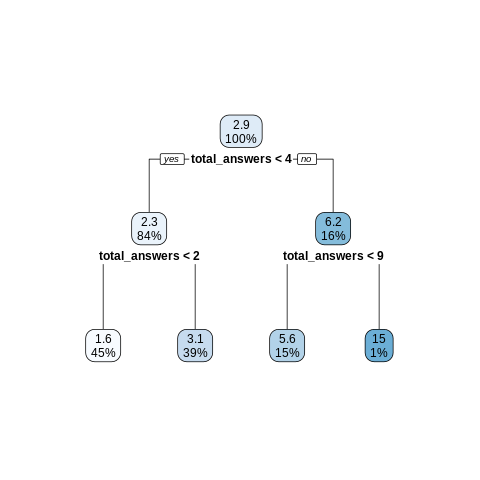

In [66]:
%%R 
#create decision tree or question score
set.seed(1234)
#split into test and train sets
split_questions <- sample(2, nrow(concat_questions_metrics_df), replace = T, prob = c(0.7, 0.3))
train_questions <- concat_questions_metrics_df[split_questions == 1,]
test_questions <- concat_questions_metrics_df[split_questions == 2,]
#fit the decision tree with training dataset
dtree_questions <- rpart(question_score ~., data = train_questions, method = "anova")
rpart.plot(dtree_questions)

In [67]:
%%R
#predict the score for test set and check the root mean squared error
pred_question_score <- predict(dtree_questions, test_questions, method = "anova")
RMSE(pred_question_score, test_questions$question_score)

[1] 4.687537


### Decision Tree for Answer score

In [68]:
#convert python dataframe to R
%R -i concat_answers_metrics_df

In [69]:
%%R
#select necessary metrics columns for decision tree and convert categorical variables to factors
concat_answers_metrics_df <- concat_answers_metrics_df %>% select(c(total_comments, answer_tag_sim_index, tag_count, answer_score, sentiment_category, Pro_industry_category, Dominant_Topic))
concat_answers_metrics_df$sentiment_category <- as.factor(concat_answers_metrics_df$sentiment_category)
concat_answers_metrics_df$Pro_industry_category <- as.factor(concat_answers_metrics_df$Pro_industry_category)
concat_answers_metrics_df$Dominant_Topic <- as.factor(concat_answers_metrics_df$Dominant_Topic)
str(concat_answers_metrics_df)

'data.frame':	51123 obs. of  7 variables:
 $ total_comments       : num  1 0 0 0 0 0 0 0 0 0 ...
 $ answer_tag_sim_index : num  0.667 0.83 0.882 0.583 0.705 ...
 $ tag_count            : num  3 2 2 2 2 2 4 4 1 2 ...
 $ answer_score         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ sentiment_category   : Factor w/ 3 levels "Negative","Neutral",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Pro_industry_category: Factor w/ 19 levels "Accounting","Aviation",..: 9 19 19 16 4 16 16 16 16 16 ...
 $ Dominant_Topic       : Factor w/ 13 levels "0","1","2","3",..: 6 7 4 6 11 9 11 11 7 11 ...


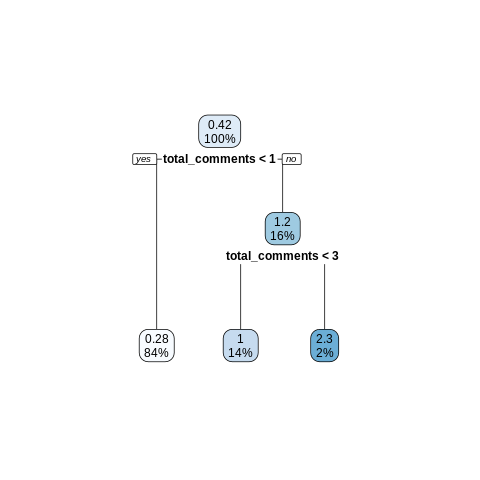

In [70]:
%%R 
#create decision tree or question score
set.seed(1234)
#split into test and train sets
split_answers <- sample(2, nrow(concat_answers_metrics_df), replace = T, prob = c(0.7, 0.3))
train_answers <- concat_answers_metrics_df[split_answers == 1,]
test_answers <- concat_answers_metrics_df[split_answers == 2,]
#fit the decision tree with training dataset
dtree_answers <- rpart(answer_score ~., data = train_answers, method = "anova")
rpart.plot(dtree_answers)

In [71]:
%%R
#predict the score for test set and check the root mean squared error
pred_answer_score <- predict(dtree_answers, test_answers, method = "anova")
RMSE(pred_answer_score, test_answers$answer_score)

[1] 0.852259


## Save files for Future use

In [73]:
from google.colab import files

concat_questions_metrics_df.to_csv('questions_metrics.csv', encoding = 'utf-8-sig') 
files.download('questions_metrics.csv')
concat_answers_metrics_df.to_csv('answers_metrics.csv', encoding = 'utf-8-sig') 
files.download('answers_metrics.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Session Info

In [72]:
%%R
sessionInfo()

R version 4.2.0 (2022-04-22)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/openblas/liblapack.so.3

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] tree_1.0-41        pROC_1.18.0        caret_6.0-92       lattice_0.20-45   
 [5] rpart.plot_3.1.0   rpart_4.1.16       sentimentr_2.9.1   lexicon_1.3.1     
 [9] reshape2_1.4.4     wordcloud_2.6      RColorBrewer_1.1-3 tm_0.7-8          
[13] NLP_0.2-